In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [40]:
load_in_df = pd.read_csv("../data/processed/months_marketdata.csv")
no_totals_df = load_in_df.iloc[:, 1:]

In [36]:
no_totals_df

,year,month,retail_total,furniture,appliances,food_stores,grocery,alcohol,hp_care,clothes,books_hobbies,fuel,food_service
0,2013,1,289252,8801,24384,47236,3746,23140,19395,15101,7004,3030,45148
1,2013,2,293309,8863,24760,47729,3787,22975,19217,14886,7013,3189,44875
2,2013,3,290921,8613,24698,47625,3759,23002,19241,14873,6907,3232,45062
3,2013,4,288771,8656,24783,47307,3760,22896,19138,14880,6767,3217,44730
4,2013,5,289692,8651,25360,47799,3790,22985,19131,14977,6857,3022,44825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022,8,464030,7895,43154,71934,5879,33883,28093,17481,8645,4099,84120
116,2022,9,462977,7835,42924,72470,5889,34170,28446,17694,8623,3854,84418
117,2022,10,467240,7800,43297,73214,5962,34080,28339,17876,8682,4335,85909
118,2022,11,462502,7176,41994,73438,5932,34304,28584,17766,8574,3788,85365


In [42]:
y

,year,month,retail_total,furniture,appliances,food_stores,grocery,alcohol,hp_care,clothes,fuel,food_service
0,2013,1,289252,8801,24384,47236,3746,23140,19395,15101,3030,45148
1,2013,2,293309,8863,24760,47729,3787,22975,19217,14886,3189,44875
2,2013,3,290921,8613,24698,47625,3759,23002,19241,14873,3232,45062
3,2013,4,288771,8656,24783,47307,3760,22896,19138,14880,3217,44730
4,2013,5,289692,8651,25360,47799,3790,22985,19131,14977,3022,44825
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022,8,464030,7895,43154,71934,5879,33883,28093,17481,4099,84120
116,2022,9,462977,7835,42924,72470,5889,34170,28446,17694,3854,84418
117,2022,10,467240,7800,43297,73214,5962,34080,28339,17876,4335,85909
118,2022,11,462502,7176,41994,73438,5932,34304,28584,17766,3788,85365


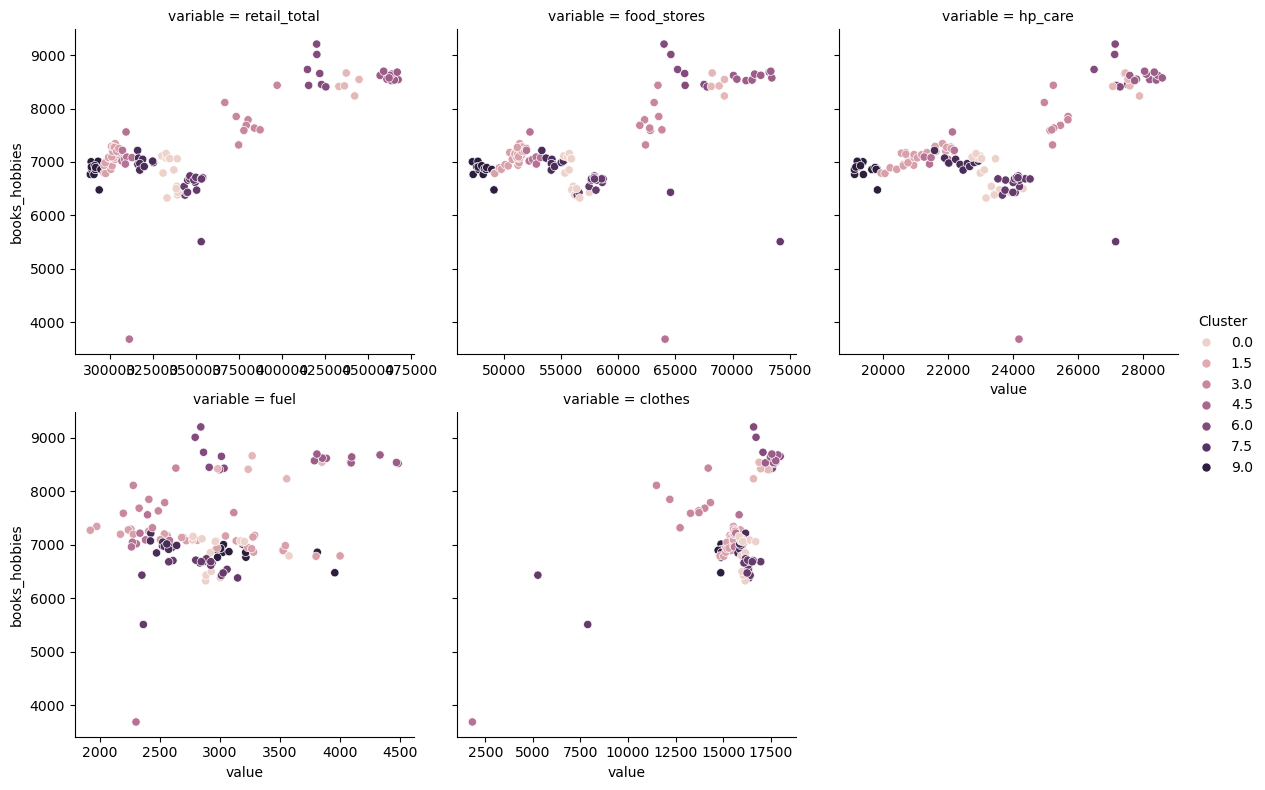

In [43]:
X = no_totals_df
y = no_totals_df["books_hobbies"]

features = ['retail_total',
            'food_stores', 'hp_care', 'fuel', 'clothes']

# Standardize
X_scaled = X.loc[:, features]

kmeans = KMeans(10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("float")
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("float")
Xy["books_hobbies"] = y
sns.relplot(
    x="value", y="books_hobbies", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["books_hobbies", "Cluster"],
    ),
)
plt.show()

In [53]:
full_df = no_totals_df.drop(['year', 'month', 'appliances', 'fuel', 'Cluster'], axis = 1)

In [54]:
full_df

,retail_total,furniture,food_stores,grocery,alcohol,hp_care,clothes,books_hobbies,food_service
0,289252,8801,47236,3746,23140,19395,15101,7004,45148
1,293309,8863,47729,3787,22975,19217,14886,7013,44875
2,290921,8613,47625,3759,23002,19241,14873,6907,45062
3,288771,8656,47307,3760,22896,19138,14880,6767,44730
4,289692,8651,47799,3790,22985,19131,14977,6857,44825
...,...,...,...,...,...,...,...,...,...
115,464030,7895,71934,5879,33883,28093,17481,8645,84120
116,462977,7835,72470,5889,34170,28446,17694,8623,84418
117,467240,7800,73214,5962,34080,28339,17876,8682,85909
118,462502,7176,73438,5932,34304,28584,17766,8574,85365


In [55]:
X_full = full_df
y_full = full_df.pop("books_hobbies")

train_X, val_X, train_y, val_y = train_test_split(X_full, y_full, random_state = 1)

market_tree_model_full= DecisionTreeRegressor(random_state = 1)
market_tree_model_full.fit(train_X, train_y)

market_tree_predictions_full = market_tree_model_full.predict(val_X)

market_tree_predictions_full

array([7851., 6915., 6793., 8623., 6684., 7073., 7136., 6684., 7081.,
       8732., 8406., 8732., 6767., 8414., 8623., 7016., 8545., 8424.,
       6851., 6793., 8424., 6927., 6544., 8545., 6431., 8732., 7292.,
       7081., 8414., 8424.])

In [56]:
val_mse_full = mean_squared_error(val_y, market_tree_predictions_full)
val_mse_full

108511.36666666667

In [57]:
val_mae_full = mean_absolute_error(val_y, market_tree_predictions_full)
val_mae_full

217.76666666666668

In [64]:
full_df_yr = no_totals_df.drop(['month', 'appliances', 'fuel', 'Cluster'], axis = 1)

X_full_yr = full_df_yr
y_full_yr = full_df_yr.pop("books_hobbies")

train_X, val_X, train_y, val_y = train_test_split(X_full_yr, y_full_yr, random_state = 1)

market_tree_model_full_yr = DecisionTreeRegressor(random_state = 1)
market_tree_model_full_yr.fit(train_X, train_y)

market_tree_predictions_full_yr = market_tree_model_full_yr.predict(val_X)

market_tree_predictions_full_yr

array([7590., 6915., 6793., 8623., 6684., 7092., 7136., 6684., 7081.,
       8732., 7851., 8732., 6767., 7686., 8620., 7016., 8545., 8424.,
       6851., 6793., 8424., 6927., 6544., 8545., 6431., 7851., 7292.,
       7081., 7590., 8424.])

In [65]:
val_mse_full = mean_squared_error(val_y, market_tree_predictions_full_yr)
val_mse_full

46030.0

In [66]:
val_mae_full = mean_absolute_error(val_y, market_tree_predictions_full_yr)
val_mae_full

158.93333333333334